# Physics of Cosmic Structures: week 2 exercises
## Thermodynamics in the expanding Universe

### II. RECOMBINATION
2)  Solve numerically the **Boltzmann equation** for the fraction of free electrons, given the equilibrium solution found
in the previous exercise.

### Boltzmann Equation

The Boltzmann equation is a fundamental equation in statistical mechanics that describes the time evolution of the number density of particle species in the presence of interactions. It plays a crucial role in understanding various physical phenomena beyond equilibrium.

**Basic Form of Boltzmann Equation**

The Boltzmann equation is represented as:

$
\frac{d(n_ia^3)}{dt} = C_i[\{n_j\}]
$

Here:
- $ n_i $ is the number density of particle species $ i $;
- $ a $ is the scale factor representing the expansion of the universe;
- $ C_i[\{n_j\}] $ is the collision term, accounting for the effects of interactions between particles.

**Interactions and Collision Term**

The collision term, $ C_i[\{n_j\}] $, depends on the specific interactions under consideration. Typically, interactions involving three or more particles are unlikely. Thus, the focus is often on single-particle decays and two-particle scatterings/annihilations.

For example, the following process can be considered:

$
1 + 2 \rightleftarrows 3 + 4
$

**Rate of Change in Abundance**

The rate of change in the abundance of species 1, $ n_1 $, due to the described process is given by:

$
\frac{1}{a^3} \frac{d(n_1a^3)}{dt} = -\alpha n_1 n_2 + \beta n_3 n_4
$

Here:
- $ \alpha \equiv \langle \sigma v \rangle $ is the thermally averaged cross section;
- The terms $- \alpha n_1 n_2 $ and $ \beta n_3 n_4 $ represent the destruction and production of particles 1, respectively.

**Equilibrium Condition**

In chemical equilibrium, the collision term vanishes, leading to the equilibrium condition:

$
\beta=\big( \frac{n_1 n_2}{n_3 n_4} \big)_{eq} \alpha
$

**Final Form of Boltzmann Equation**

Combining the above expressions, the Boltzmann equation can be written as:

$
\frac{1}{a^3} \frac{d(n_1a^3)}{dt} = - \langle \sigma v \rangle \big[ n_1n_2-\big( \frac{n_1 n_2}{n_3 n_4} \big)_{eq} n_3n_4 \big]
$

This equation provides a formal description of how the number density of a particle species evolves due to interactions, considering both production and destruction processes.

**Recombination**

The main steps to obtain the final equation, identical to the *Riccati equation* for dark matter freeze-out, are given below.

$
e^- + p^+ \rightleftarrows H + \gamma
$

$\Rightarrow \quad$ the Boltzmann equation for the electron density can be written as 
$ \quad \frac{1}{a^3} \frac{d(n_ea^3)}{dt} = - \langle \sigma v \rangle \big[ n_en_p-\big( \frac{n_e n_p}{n_H n_\gamma} \big)_{eq} n_Hn_\gamma \big]
$

- $n_e=n_p, \ n_H=n_H^{eq}, \ n_\gamma=n_\gamma ^{eq}:$

    $\frac{1}{a^3} \frac{d(n_ea^3)}{dt} = - \langle \sigma v \rangle \big[ n_e^2 - (n_e^{eq})^2 \big]$
    
    - $\langle \sigma v \rangle \simeq \sigma_T \big( \frac{B}{T} \big)^{1/2}$, where $\sigma_T$ is the Thomson cross section:

        $\frac{dX_e}{dx}=-\frac{\lambda}{x^2}\big[X_e^2-(X_e^{eq})^2\big] \quad$ where $\quad \lambda=\frac{n_b \langle \sigma v \rangle}{xH}|_{x=1}\simeq 4 \cdot 10^3$

        $\frac{dX_e}{dT}=\frac{\lambda}{B}\big[X_e^2-(X_e^{eq})^2\big]$

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root_scalar
from scipy.integrate import odeint
from scipy.interpolate import interp1d

### Constants

In [212]:
mp=9.3828e8 #eV/c^2 proton mass
me=0.511e6 #eV/c^2 electron mass
mH=mp+me-13.6 #eV/c^2 hydrogen atom mass
B=mp+me-mH #eV/c^2 binding energy
eta=6e-10
Lambda=4e3
zeta3=1.202 #Riemann zeta function at 3

## Saha Equation
At temperatures above about $1 \ eV$ there was very little neutral hydrogen because photons were still tightly coupled to the electrons via Compton scattering, however, when the temperature became low enough, the electrons and nuclei combined to form neutral atoms and the density of free electrons fell sharply. This important event in the history of the early universe is called *Recombination*.

The **Saha equation**, which describes the evolution of the free electron fraction, is given by:

$
\left( \frac{1 - X_e}{X_e^2} \right)_{eq}= \frac{2 \zeta(3)}{\pi^2} \eta \left(\frac{2 \pi T}{m_e}\right)^{3/2} e^{B_H/T}
$

where:
- $X_e$ is the free electron fraction, defined as the ratio $X_e \equiv \frac{n_e}{n_b}$ ($n_b$ is the baryon density);
- $\zeta(3)$ is the Riemann zeta function evaluated at 3;
- $\eta \simeq 6 \ 10^{-10}$ is the *baryon-to-photon ratio*;
- $T$ is the temperature (in $eV$);
- $m_e$ is the electron mass (in $eV/c^2$);
- $B_H=13.6 \ eV$ is the binding energy of hydrogen.

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/895840936.py:2: RuntimeWarning: overflow encountered in exp
  return (1-Xe)/Xe**2-(2*zeta3/np.pi**2)*eta*(2*np.pi*T/me)**(3/2)*np.exp(B/T)
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/895840936.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xe_eq_solution=fsolve(saha_equation,Xe_eq_initial,args=(T,))
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/895840936.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  Xe_eq_solution=fsolve(saha_equation,Xe_eq_initial,args=(T,))


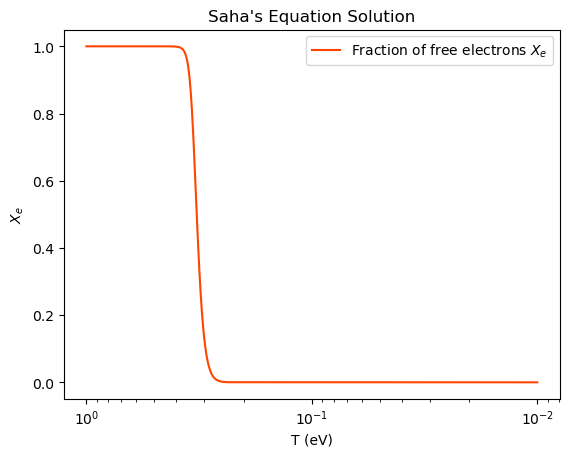

In [213]:
def saha_equation(Xe,T):
    return (1-Xe)/Xe**2-(2*zeta3/np.pi**2)*eta*(2*np.pi*T/me)**(3/2)*np.exp(B/T)

T_Saha=np.linspace(0.01,1,1000)
Xe_eq=[]

for T in T_Saha:
    Xe_eq_initial=1e-8
    #solve using fsolve (Newton-Raphson method)
    Xe_eq_solution=fsolve(saha_equation,Xe_eq_initial,args=(T,))
    Xe_eq.append(Xe_eq_solution[0])

plt.plot(T_Saha,Xe_eq,color='orangered',label='Fraction of free electrons $X_e$')
plt.xlabel('T (eV)')
plt.ylabel('$X_e$')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.title("Saha's Equation Solution")
plt.legend()
plt.show()

## Boltzmann Equation

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/1495065149.py:2: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xe_eq_T=fsolve(saha_equation,1e-8,args=(T,))[0]
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/895840936.py:2: RuntimeWarning: overflow encountered in exp
  return (1-Xe)/Xe**2-(2*zeta3/np.pi**2)*eta*(2*np.pi*T/me)**(3/2)*np.exp(B/T)


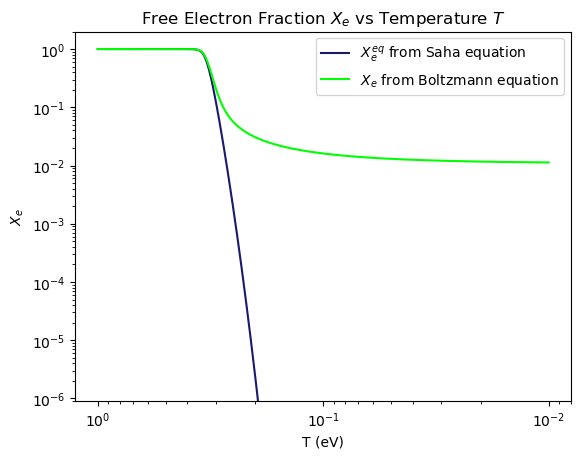

In [226]:
def boltzmann_equation(Xe,T):
    Xe_eq_T=fsolve(saha_equation,1e-8,args=(T,))[0]
    dXe_dT=Lambda/B*(Xe**2-Xe_eq_T**2)
    return dXe_dT

T_Boltzmann=np.linspace(1,0.01,1000)

Xe=odeint(boltzmann_equation,1,T_Boltzmann).flatten()

plt.plot(T_Saha,Xe_eq,color='midnightblue',label=r'$X_e^{eq}$ from Saha equation')
plt.plot(T_Boltzmann,Xe,color='lime',label='$X_e$ from Boltzmann equation')
plt.xlabel('T (eV)')
plt.ylabel(r'$X_e$')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.ylim(9e-7, 2)
plt.legend()
plt.title('Free Electron Fraction $X_e$ vs Temperature $T$')
plt.show()

This plot shows the evolution of the free electron fraction as predicted both by the Saha approximation and by the Boltzmann equation. $X_e^{eq}$ correctly identifies the first phase of recombination, but it is insufficient if the aim is to determine the relic density of electrons after freeze-out. Indeed $X_e$ allows us to observe that a residual ionization fraction of electrons freezes out when the interactions in $ e^- + p^+ \rightleftarrows H + \gamma $ become inefficient.

### Recombination Temperature
The recombination temperature $T_{rec}$ can be defined as the temperature where $X_e = 10^{−1}$, namely when 90% of the electrons have combined with protons to form hydrogen.

In [215]:
#from the Saha equation
T_rec_S = None
for i in range(len(T_Saha)):
    if Xe_eq[i] > 0.1:
        T_rec_S = T_Saha[i]
        break

print(f"Recombination temperature T_rec_S: {T_rec_S} eV")

#from the Boltzmann equation
T_rec_B = None
for i in range(len(T_Boltzmann)):
    if Xe[i] < 0.1:
        T_rec_B = T_Boltzmann[i]
        break

print(f"Recombination temperature T_rec_B: {T_rec_B} eV")

Recombination temperature T_rec_S: 0.2963963963963964 eV
Recombination temperature T_rec_B: 0.2775675675675675 eV


Due to the steep slope of the solution of Saha equation, the recombination temperature $T_{rec,S}$ differs from that obtained with the Boltzmann equation, $T_{rec,B}$.

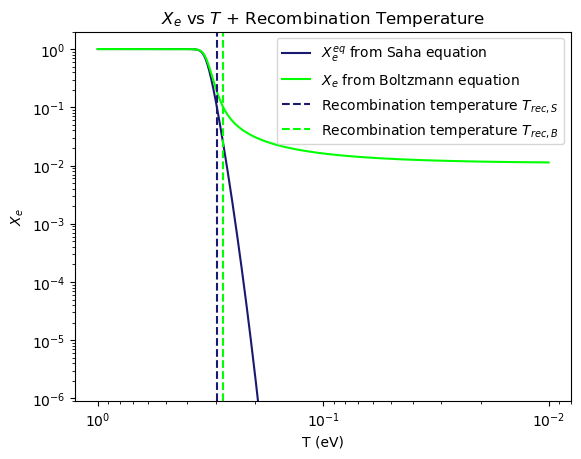

In [216]:
plt.plot(T_Saha,Xe_eq,color='midnightblue',label=r'$X_e^{eq}$ from Saha equation')
plt.plot(T_Boltzmann,Xe,color='lime',label='$X_e$ from Boltzmann equation')
plt.axvline(x=T_rec_S, color='midnightblue', linestyle='--', label='Recombination temperature $T_{rec,S}$')
plt.axvline(x=T_rec_B, color='lime', linestyle='--', label='Recombination temperature $T_{rec,B}$')
plt.xlabel('T (eV)')
plt.ylabel(r'$X_e$')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.ylim(9e-7, 2)
plt.legend()
plt.title('$X_e$ vs $T$ + Recombination Temperature')
plt.show()

### Electron Freeze-out Abundance
From the solution of the Boltzmann equation the *relic electron abundance* can be easily found by studying the minimum value of $X_e$.

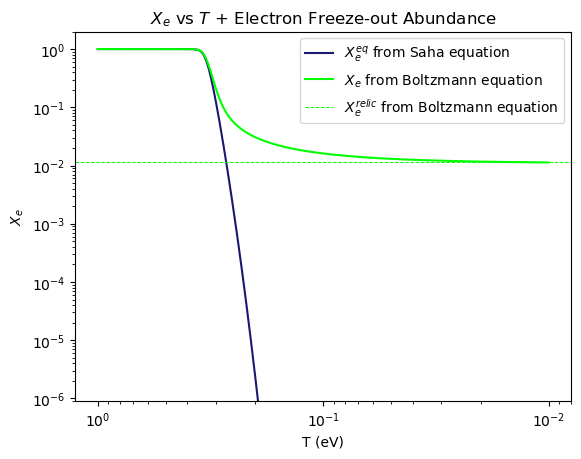

In [228]:
Xe_relic=np.min(Xe)

plt.plot(T_Saha,Xe_eq,color='midnightblue',label=r'$X_e^{eq}$ from Saha equation')
plt.plot(T_Boltzmann,Xe,color='lime',label='$X_e$ from Boltzmann equation')
plt.axhline(y=Xe_relic, color='lime', linestyle='--', linewidth='0.7',label='$X_e^{relic}$ from Boltzmann equation')
plt.xlabel('T (eV)')
plt.ylabel(r'$X_e$')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.ylim(9e-7, 2)
plt.legend()
plt.title('$X_e$ vs $T$ + Electron Freeze-out Abundance')
plt.show()

From the relation $T_{rec}=T_0(1+z_{rec})$, with $T_0=2.725 K$, the redshift of recombination $z_{rec}$ can be found.

In [217]:
kB=8.617333262145e-5 #eV/K
T0=2.725*kB

z_S=T_rec_S/T0-1 #Saha
z_B=T_rec_B/T0-1 #Boltzmann

print(f"Recombination redshift z_S: {z_S}")
print(f"Recombination redshift z_B: {z_B}")

Recombination redshift z_S: 1261.2155424382365
Recombination redshift z_B: 1181.0322450614606


Lastly, in order to verify the previous result, the Boltzmann equation can also be solved in terms of redshift:

$\frac{dX_e}{dT}=\frac{\lambda}{B}\big[X_e^2-(X_e^{eq})^2\big] \quad \rightarrow \quad \frac{1}{T_0}\frac{dX_e}{dz}=\frac{\lambda}{B}\big[X_e^2-(X_e^{eq})^2\big]$

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/3047065993.py:3: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xe_eq_T=fsolve(saha_equation,1e-8,args=(T,))[0]
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_28163/895840936.py:2: RuntimeWarning: overflow encountered in exp
  return (1-Xe)/Xe**2-(2*zeta3/np.pi**2)*eta*(2*np.pi*T/me)**(3/2)*np.exp(B/T)


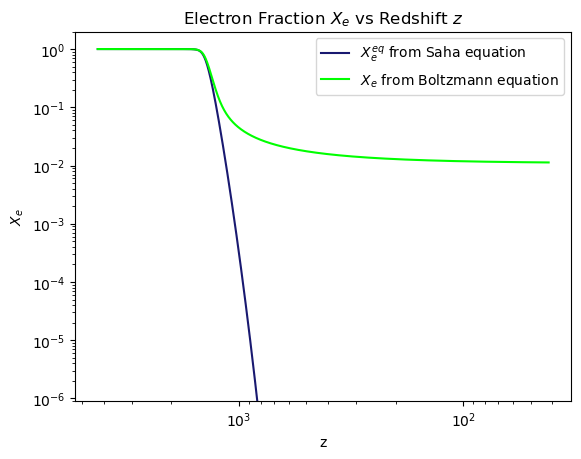

In [218]:
def boltzmann_equation_z(Xe_z,z):
    T=T0*(1+z)
    Xe_eq_T=fsolve(saha_equation,1e-8,args=(T,))[0]
    dXe_dz=T0*Lambda/B*(Xe_z**2-Xe_eq_T**2)
    return dXe_dz

z_Boltzmann=T_Boltzmann/T0-1
z_Saha=T_Saha/T0-1

Xe_z=odeint(boltzmann_equation_z,1,z_Boltzmann).flatten()

plt.plot(z_Saha,Xe_eq,color='midnightblue',label=r'$X_e^{eq}$ from Saha equation')
plt.plot(z_Boltzmann,Xe_z,color='lime',label='$X_e$ from Boltzmann equation')
plt.xlabel('z')
plt.ylabel(r'$X_e$')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.ylim(9e-7, 2)
plt.legend()
plt.title('Electron Fraction $X_e$ vs Redshift $z$')
plt.show()

To cross check the value of the recombination redshift obtained from $T_{rec,B}$, $z_{rec,B}$ can be extracted directly from the solution of Boltzmann equation as a function of z.

In [219]:
z_rec_B = None
for i in range(len(z_Boltzmann)):
    if Xe_z[i] < 0.1:
        z_rec_B = z_Boltzmann[i]
        break

print(f"Recombination redshift z_rec_B: {z_rec_B}")

Recombination redshift z_rec_B: 1181.0322450614606


This value is in perfect agreement with the previous one.